In [1]:
import pandas as pd

#0=54 V, 1=54.5 V, 2=55 V, 3=55.5 V, 4=56 V, 5=56.5 V, 6=57 V

hl = 0
        
df = pd.read_csv('adj54v.CSV', sep=';')
masks = pd.read_csv('masks.csv', delimiter=';')

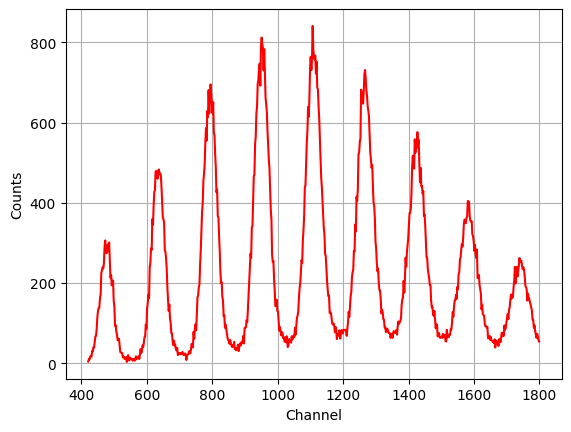

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#plot the histogram
fig, ax = plt.subplots()
ax.plot(df['Channel'], df['Counts'], 'r-')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [3]:
yerr = np.sqrt(df['Counts'])

In [4]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm

def func(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, mu4, sigma4, A4, mu5, sigma5, A5, mu6, sigma6, A6, mu7, sigma7, A7, mu8, sigma8, A8, mu9, sigma9, A9, muB, sigmaB, B):
    return A1 * norm.pdf(x, mu1, sigma1) + A2 * norm.pdf(x, mu2, sigma2) + A3 * norm.pdf(x, mu3, sigma3) + A4 * norm.pdf(x, mu4, sigma4) + A5 * norm.pdf(x, mu5, sigma5) + A6 * norm.pdf(x, mu6, sigma6) + A7 * norm.pdf(x, mu7, sigma7) + A8 * norm.pdf(x, mu8, sigma8) + A9 * norm.pdf(x, mu9, sigma9) + B * norm.pdf(x, muB, sigmaB)

ls = LeastSquares(df['Channel'], df['Counts'], yerr, func)
m = Minuit(ls, mu1=masks['Media1'][hl], sigma1=20, A1=masks['A1'][hl], mu2=masks['Media2'][hl], sigma2=20, A2=masks['A2'][hl], mu3=masks['Media3'][hl], sigma3=20, A3=masks['A3'][hl], mu4=masks['Media4'][hl], sigma4=20, A4=masks['A4'][hl], mu5=masks['Media5'][hl], sigma5=20, A5=masks['A5'][hl], mu6=masks['Media6'][hl], sigma6=20, A6=masks['A6'][hl], mu7=masks['Media7'][hl], sigma7=20, A7=masks['A7'][hl], mu8=masks['Media8'][hl], sigma8=20, A8=masks['A8'][hl], mu9=masks['Media9'][hl], sigma9=20, A9=masks['A9'][hl], muB=masks['MediaB'][hl], sigmaB=600, B=masks['AB'][hl])
m.values['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
ls.mask = (df['Channel'] > masks['Left1'][hl]) & (df['Channel'] < masks['Right1'][hl])
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left2'][hl]) & (df['Channel'] < masks['Right2'][hl])
m.values['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left3'][hl]) & (df['Channel'] < masks['Right3'][hl])
m.values['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left4'][hl]) & (df['Channel'] < masks['Right4'][hl])
m.values['A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left5'][hl]) & (df['Channel'] < masks['Right5'][hl])
m.values['A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left6'][hl]) & (df['Channel'] < masks['Right6'][hl])
m.values['A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left7'][hl]) & (df['Channel'] < masks['Right7'][hl])
m.values['A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left8'][hl]) & (df['Channel'] < masks['Right8'][hl])
m.values['A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left9'][hl]) & (df['Channel'] < masks['Right9'][hl])
m.values['B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1000)
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
m.migrad()
m.hesse()
display(m)
print(m.values)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 700.3 (χ²/ndof = 1.1)      │             Nfcn = 3488              │
│ EDM = 0.000113 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu1    │  476.92   │   0.25    │            │            │         │         │       │
│ 1 │ sigma1 │   19.03   │   0.20    │            │            │         │         │       │
│ 2 │ A1     │  13.56e3  │  0.17e3   │            │            │         │         │       │
│ 3 │ mu2    │  635.07   │   0.20    │            │            │         │         │       │
│ 4 │ sigma2 │   20.08   │   0.17    │            │            │         │         │       │
│ 5 │ A2     │  23.91e3  │  0.24e3   │            │            │         │         │       │
│ 6 │ mu3    │  793.72   │   0.18    │            │            │         │         │       │
│ 7 │ sigma3 │   21.24   │   0.16    │            │            │         │         │       │
│ 8 │ A3     │  34.32e3  │  0.29e3   │            │            │         │         │       │
│ 9 │ mu4    │  951.53   │   0.18    │            │            │         │         │       │
│ 10│ sigma4 │   21.68   │   0.16    │            │            │         │         │       │
│ 11│ A4     │  40.49e3  │  0.33e3   │            │            │         │         │       │
│ 12│ mu5    │ 1.10998e3 │ 0.00019e3 │            │            │         │         │       │
│ 13│ sigma5 │   22.55   │   0.18    │            │            │         │         │       │
│ 14│ A5     │  40.93e3  │  0.35e3   │            │            │         │         │       │
│ 15│ mu6    │ 1.26770e3 │ 0.00021e3 │            │            │         │         │       │
│ 16│ sigma6 │   22.92   │   0.20    │            │            │         │         │       │
│ 17│ A6     │  36.00e3  │  0.35e3   │            │            │         │         │       │
│ 18│ mu7    │ 1.42589e3 │ 0.00026e3 │            │            │         │         │       │
│ 19│ sigma7 │   24.03   │   0.26    │            │            │         │         │       │
│ 20│ A7     │  28.36e3  │  0.33e3   │            │            │         │         │       │
│ 21│ mu8    │ 1.58380e3 │ 0.00034e3 │            │            │         │         │       │
│ 22│ sigma8 │   25.9    │    0.4    │            │            │         │         │       │
│ 23│ A8     │  21.0e3   │   0.4e3   │            │            │         │         │       │
│ 24│ mu9    │ 1.7417e3  │ 0.0004e3  │            │            │         │         │       │
│ 25│ sigma9 │   27.3    │    0.6    │            │            │         │         │       │
│ 26│ A9     │  14.3e3   │   0.4e3   │            │            │         │         │       │
│ 27│ muB    │  1.304e3  │  0.011e3  │            │            │         │         │       │
│ 28│ sigmaB │    366    │     8     │            │            │         │         │       │
│ 29│ B      │  63.7e3   │   1.4e3   │            │            │         │         │       │
└───┴────────┴─────

<ValueView mu1=476.91799058080886 sigma1=19.02641343103884 A1=13556.163468131412 mu2=635.0708951806855 sigma2=20.08451952875302 A2=23913.77864753903 mu3=793.7227952537862 sigma3=21.23535924788967 A3=34324.83795057213 mu4=951.5280243685135 sigma4=21.678482379758513 A4=40488.1902797023 mu5=1109.981923287188 sigma5=22.55245689259912 A5=40929.0461493686 mu6=1267.7025059945192 sigma6=22.92083275341336 A6=35999.78072154188 mu7=1425.8872061067448 sigma7=24.026652954395537 A7=28359.09751612707 mu8=1583.800685153628 sigma8=25.855039313792588 A8=20991.28423757424 mu9=1741.688044180842 sigma9=27.327692265202913 A9=14281.262376165943 muB=1303.676062325814 sigmaB=366.0625840285476 B=63734.394326529015>


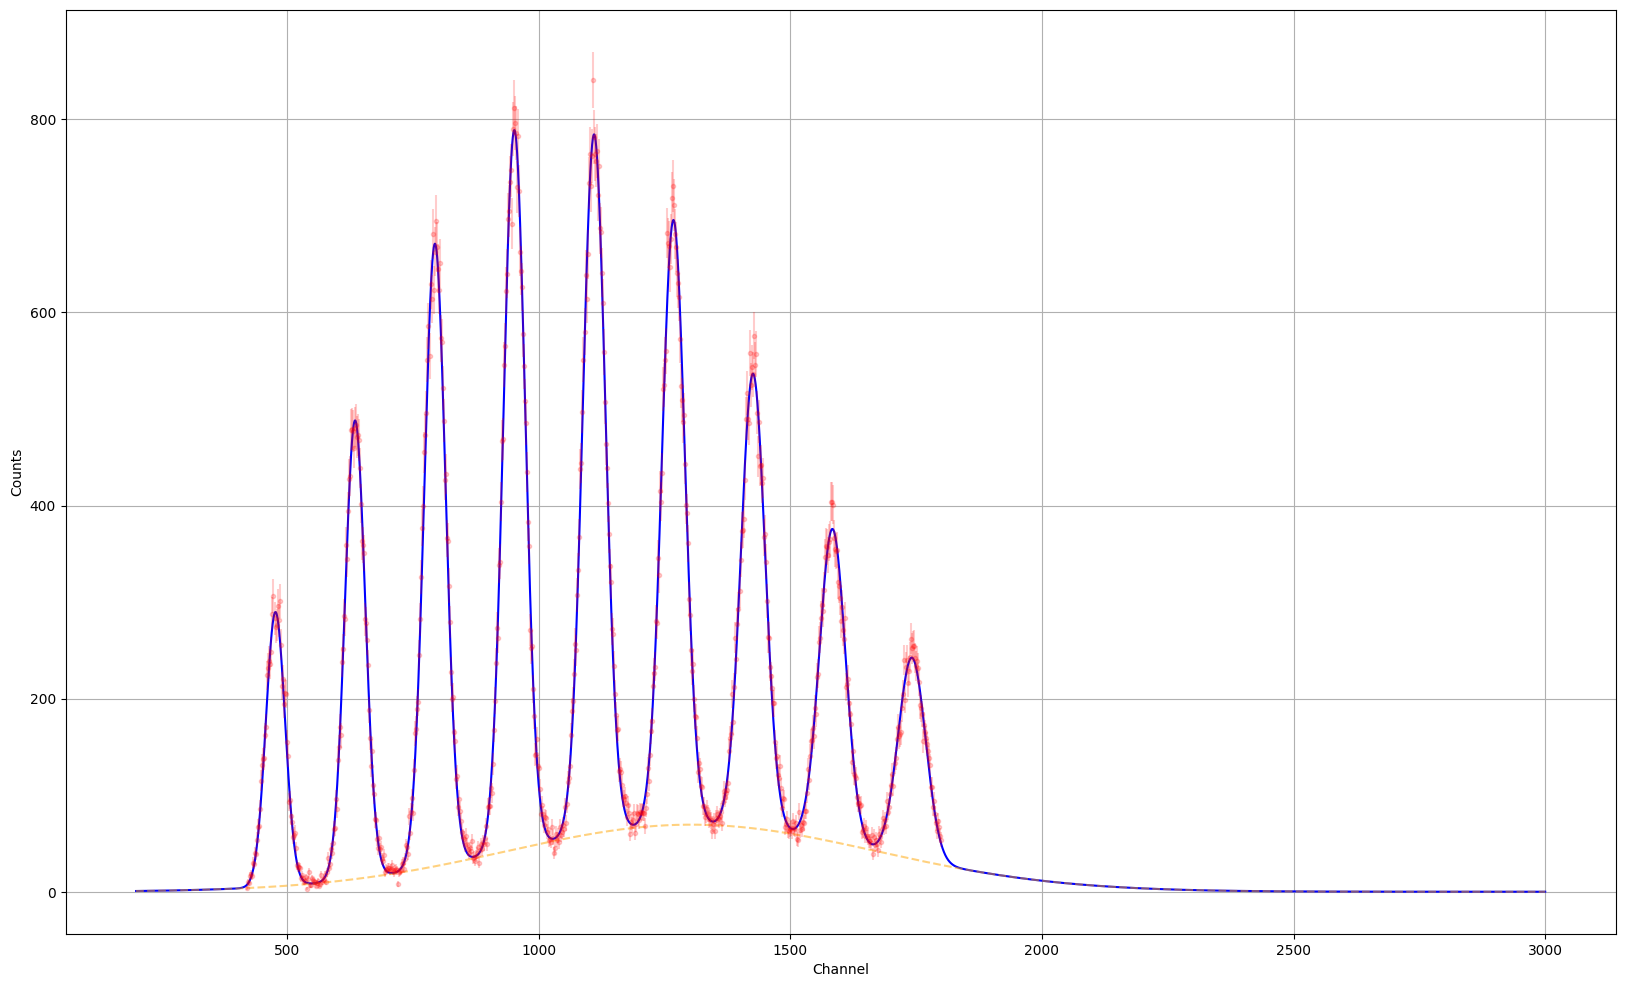

In [5]:
#plotta la funzione
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
x = np.linspace(200, 3000, 10000)
y = func(x, *m.values)
ax.plot(x, y, 'b-')
ax.plot(x, norm.pdf(x, m.values['muB'], m.values['sigmaB'])*m.values['B'], color='orange', linestyle='--', alpha=0.5)
ax.errorbar(df['Channel'], df['Counts'], yerr, fmt='r.', alpha=0.2)
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [6]:
list_deltachannel = np.array([m.values['mu2']-m.values['mu1'], m.values['mu3']-m.values['mu2']]) #complete
list_deltachannel = np.append(list_deltachannel, [m.values['mu4']-m.values['mu3'], m.values['mu5']-m.values['mu4'], m.values['mu6']-m.values['mu5'], m.values['mu7']-m.values['mu6'], m.values['mu8']-m.values['mu7'], m.values['mu9']-m.values['mu8']])

correction_factor = (2*(4*10**(-9)))/(50*(2**12)*32)

gain = np.mean(list_deltachannel)*correction_factor/(1.602*10**(-19))
gain_err = np.std(list_deltachannel)/np.sqrt(len(list_deltachannel))*correction_factor/(1.602*10**(-19))

print('gain =', gain, '+/-', gain_err)
print('convADC =', np.mean(list_deltachannel), '+/-', np.std(list_deltachannel)/np.sqrt(len(list_deltachannel)))

gain = 1204672.8751841278 +/- 825.1789458845745
convADC = 158.09625670000415 +/- 0.10829305211347666


In [7]:
from jax import grad, jacfwd
import jax.numpy as np

def error_prop_jax_gen(q,x,dx):
    jac = jacfwd(q)
    return np.sqrt(np.sum(np.power(jac(x)*dx,2)))

def resolution_function(x):
    return (x[2]-x[0])/np.sqrt(x[3]**2-x[1]**2)

x_=np.array([m.values['mu2'], m.values['sigma2'], m.values['mu3'], m.values['sigma3']])
dx_=np.array([m.errors['mu2'], m.errors['sigma2'], m.errors['mu3'], m.errors['sigma3']])

print('resolution =', resolution_function(x_), '+/-', error_prop_jax_gen(resolution_function, x_, dx_))

resolution = 23.006914 +/- 2.3245327


In [8]:
print(m.values['mu3'], m.errors['mu3'])

793.7227952537862 0.18171583788218748


In [12]:
from scipy.stats import chi2

def normal(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

ls = LeastSquares(df['Channel'], df['Counts'], yerr, normal)
channel = df['Channel']

def repeat_fit(ls, left_bound, right_bound, mu, sigma, A, ampiezza_picco_limite, dis=False, limit_ADC=100):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di mu in cui è accettabile avere il picco
    '''
    peak_list = []
    error_peak_list = []
    sigma_list = []
    error_sigma_list = []
    area_list = []
    error_area_list = []
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                area_list.append(m.values['A'])
                error_area_list.append(m.errors['A'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC/2)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                area_list.append(m.values['A'])
                error_area_list.append(m.errors['A'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC/2) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                area_list.append(m.values['A'])
                error_area_list.append(m.errors['A'])
                if dis==True: display(m)
        ls.mask = None
    return np.array(peak_list), np.array(error_peak_list), np.array(sigma_list), np.array(error_sigma_list), np.array(area_list), np.array(error_area_list)

def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = abs(np.max(values) - np.min(values))/2 # errore sistematico dovuto alla scelta del range di interpolazione.
    # non è errore statistico perchè non è dato dalla ripetizione della misura
    return mean, error_mean

q, w, e, r, t, y = repeat_fit(ls, masks['Left3'][hl], masks['Right3'][hl], masks['Media3'][hl], 20, masks['A3'][hl], 10)
print(weighted_mean(q, w))

(Array(793.77423, dtype=float32), Array(1.5555115, dtype=float32))
